In [117]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [118]:
# Read reference image
im1 = cv2.imread('data/image_1.png')
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

# Read image to be aligned
im2 = cv2.imread('data/image_38.png')
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

(array([-50.,   0.,  50., 100., 150., 200., 250.]),
 [Text(0, -50.0, '−50'),
  Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250')])

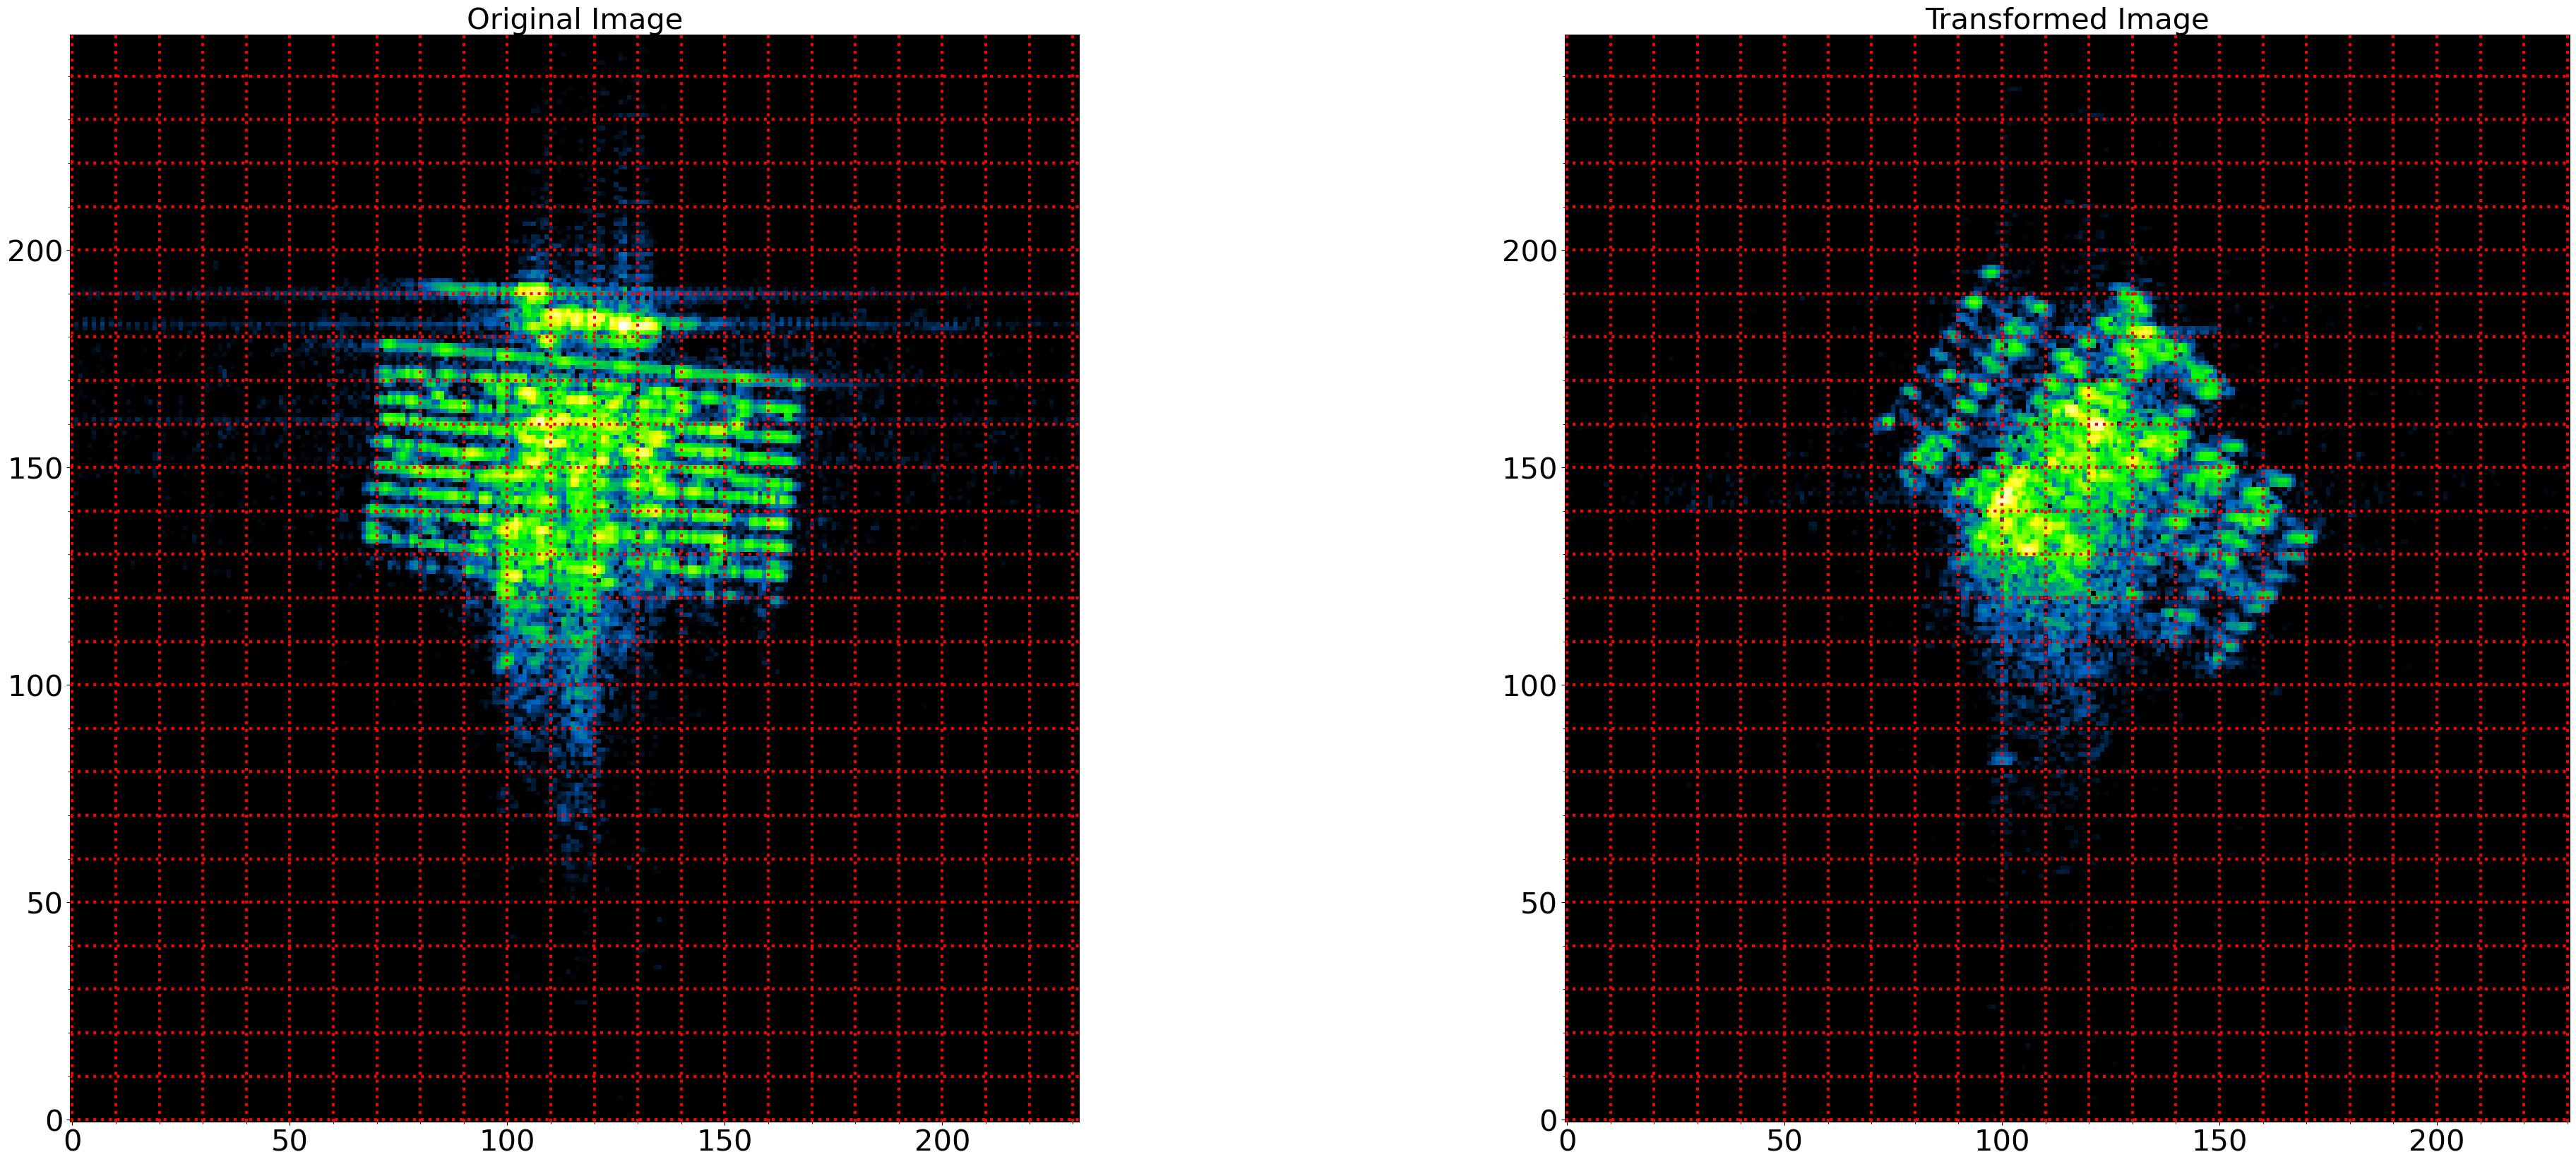

In [119]:
# Display images to select key points (image flipped upside-down to vertically align coordinates)
plt.figure(figsize=(50, 20))
plt.subplot(121); plt.imshow(im1, origin='lower') ; plt.title('Original Image', fontsize=30); plt.grid(color='red', linestyle=':', which='both', linewidth=3); plt.minorticks_on(); plt.xticks(fontsize=30); plt.yticks(fontsize=30)
plt.subplot(122); plt.imshow(im2, origin='lower'); plt.title('Transformed Image', fontsize=30); plt.grid(color='red', linestyle=':', which='both', linewidth=3); plt.minorticks_on(); plt.xticks(fontsize=30); plt.yticks(fontsize=30)

Text(0.5, 1.0, 'Transformed Image')

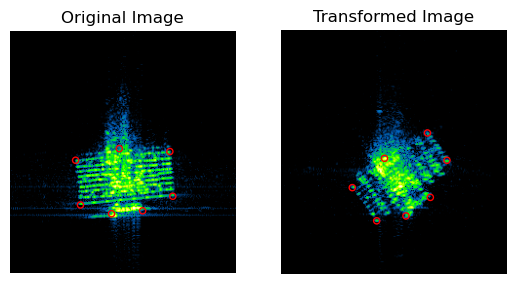

In [120]:
# Define key points
points1 = np.array([(67, 133), (72, 179), (167, 170), (164, 124), (112, 121), (104, 188), (136, 185)])

points2 = np.array([(73, 161), (98, 195), (170, 133), (150, 105), (106, 131), (128, 190), (153, 171)])

x1, y1 = zip(*points1)
x2, y2 = zip(*points2)

# Display points
plt.subplot(121); plt.axis('off'); plt.imshow(im1); plt.scatter(x1, y1, s=20, facecolors='none', edgecolors='red'); plt.title('Original Image')
plt.subplot(122); plt.axis('off'); plt.imshow(im2); plt.scatter(x2, y2, s=20, facecolors='none', edgecolors='red'); plt.title('Transformed Image')

In [121]:
# Find homography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

Text(0.5, 1.0, 'Transformed image')

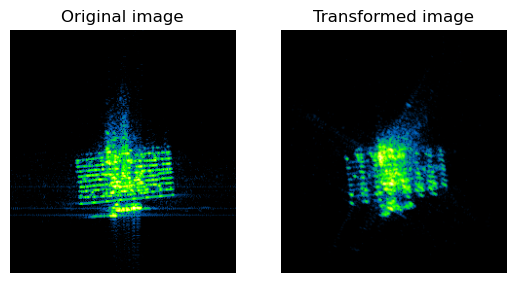

In [122]:
# Use homography to warp image
height, width, channels = im1.shape
im2_reg = cv2.warpPerspective(im2, h, (width, height))

# Display results
plt.subplot(121); plt.imshow(im1); plt.axis('off'); plt.title('Original image')
plt.subplot(122); plt.imshow(im2_reg); plt.axis('off'); plt.title('Transformed image')